In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import plotly.express as px
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
print(f"Total No of rows: {df.shape[0]} and columns: {df.shape[1]}")

Total No of rows: 100000 and columns: 28


In [5]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
# checking null values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
# duplicated values
df.duplicated().sum()

0

In [15]:
df.describe().T.astype('int')

,count,mean,std,min,25%,50%,75%,max
ID,100000,80631,43301,5634,43132,80631,118130,155629
Customer_ID,100000,25982,14340,1006,13664,25777,38385,50999
Month,100000,4,2,1,2,4,6,8
Age,100000,33,10,14,24,33,42,56
SSN,100000,500461680,290826734,81349,245168577,500688611,756002666,999993421
Annual_Income,100000,50505,38299,7005,19342,36999,71683,179987
Monthly_Inhand_Salary,100000,4197,3186,303,1626,3095,5957,15204
Num_Bank_Accounts,100000,5,2,0,3,5,7,11
Num_Credit_Card,100000,5,2,0,4,5,7,11
Interest_Rate,100000,14,8,1,7,13,20,34


In [16]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [17]:
# no of unique values 
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [18]:
# value count of months
df['Month'].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

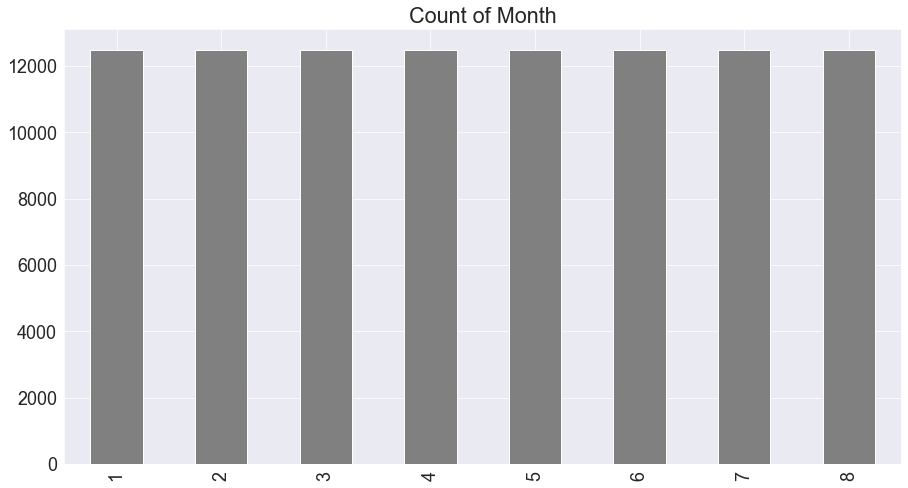

In [21]:
# value count of months and plot
df['Month'].value_counts().plot(kind ='bar', color= 'grey')
plt.title("Count of Month")
plt.show()

In [22]:
df['Age'].value_counts()

38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: Age, dtype: int64

<AxesSubplot:>

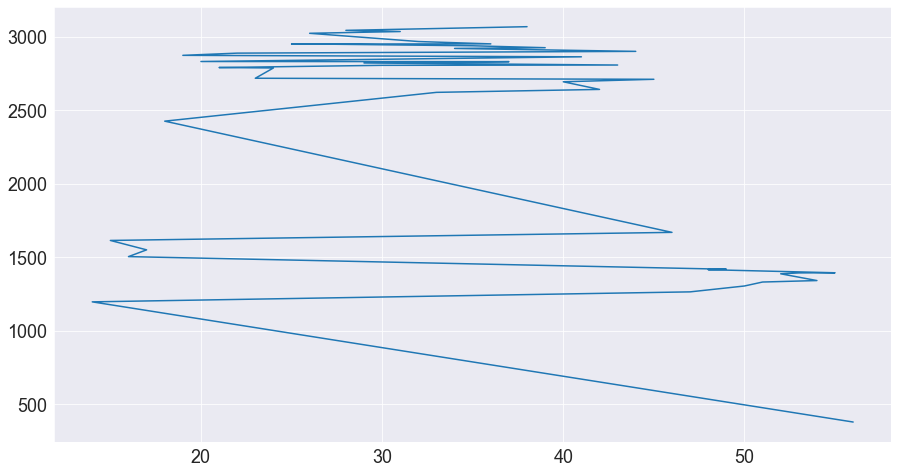

In [23]:
sns.lineplot()